In [1]:
import pandas as pd

In [2]:
%run "2D Rectangle Plotting Functions.ipynb"
%run "3D Functions.ipynb"
%run "Color map Functions.ipynb"
%run "Point Generation Functions.ipynb"
%run Distance.ipynb
%run "Volume Estimation.ipynb"
%run "Function Bank.ipynb"
%run "2D Plotting.ipynb"
%run "Filter Boxes.ipynb"
%run "Miscellaneous.ipynb"
%matplotlib inline

## Estimating Volume By Sampling Points Over a Region

Recall that the volume of a solid, V, between a surface, S, and a region, R, can be estimated by selecting subareas of R, calculating a value of S at a certain point in each subarea and assuming that this value of S holds true for the entire subarea. Summing all of these volumes over the region R will result in an estimate of the volume of the solid.

As the subareas of R approach 0, the number of volumes to be added together approaches infinity, and thus, by integrating over the region R, we can find an exact value of the volume of the solid between S and R.

Thus, the double integral of a surface S, defined by a function $f$ over a region R, can be expressed as a Reimann sum:

$$\iint_R f \,dA \approx \sum_{i,j} f(x_{ij}^*,y_{ij}^*) \Delta A_{ij}$$

where $(x_{ij}^*,y_{ij}^*)$ is a point in the rectangle, R, with indices $i,j$ and $\Delta A_{ij}$ is its area.

Consider the following example <b>(Note: Pay attention to the code as you will have to edit similar code later): </b> Estimate the volume of the solid that lies above the region $R = [0,2] x [0,2]$ and below the surface $ z = 15 - xy^2 + 4(x+4)^2$ by dividing R into four equal squares ($n = 2 $) and choosing the sample point to be the northeast corner of each square

First, let's see what the surface z looks like; run the functions below in order to define z, z_func, and graph the surface z in 3D

In [3]:
def z_func(x,y):
    """Define a function, z, in terms of x and y"""
    return (15-x*y**2+4*(x+4)**2)

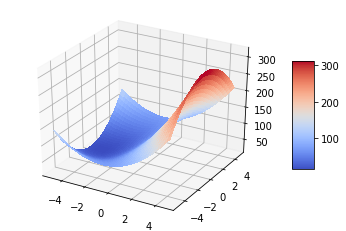

In [4]:
graphSurface(z_func) #graphs a 3D representation of a function

Matplotlib, however, does a better job at representing function in 2D, so an easier way to visualize the function is through a colormap, which is a 2D representation of a function, similar to a contour plot.

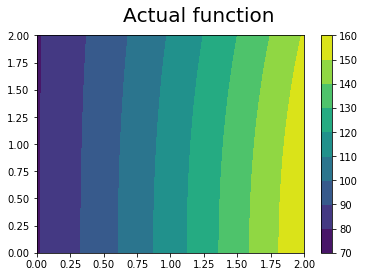

In [5]:
colorMap(z_func)

Now, let's consider the region R = $[0,2]$ x $[0,2]$ Before graphing any points on R, lets use the function $ plotRectangle(a, b, c, d, n)$, which displays an $ n$ x $n $ grid of subrectangles in the region  R = $[a,b]$  x $[c,d] $

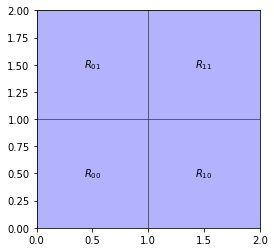

In [6]:
plotRectangle(0,2,0,2,2) #plots the region [0,2] x [0,2] split into 2^2 equal subareas

In the case that our domain, the rectangle $[a,b]\times [c,d]$ is divided into $n^2$ subrectangles and we use the "northeast" corner of each rectangle as our sample point, this can be further specified with $\Delta x = \frac{b-a}{n}, \Delta y = \frac{d-c}{n}$,  

$$\sum_{i=1}^n \sum_{j=1}^n f\left( a + i \Delta x,c + j \Delta y \right) \Delta x \Delta y$$

Let's generate a list of the NorthEast point of each subrectangle, using the following function, which essentially translates the mathematical statements above into code, except we do not multiply by $\Delta x$ and $\Delta y$ and do not actually compute the value of the function at each point, since we are not yet estimating the volume

In [7]:
def northEastGenerator(a,b,c,d,n):
    """Returns a dataframe of the northeastern points of each subrectangle on the region [a,b] x [c,d] with
    n^2 subareas"""
    w = b - a
    h = d - c
    dx = w / n
    dy = h / n
    xVals = []
    yVals = []
    #notice how end of limit seems to be one higher than it should be - this is because, in Python,
    #the range function counts up to but not including the upper end of the range specified
    for i in range(1,n+1):
        for j in range(1,n+1):
            xVals.append(a + (i * dx))
            yVals.append(c + (j * dy))
    d = {'x' : xVals, 'y': yVals}
    generatedPoints = pd.DataFrame(data = d)
    return generatedPoints

In [8]:
#generates a list of the northeast point of each subrectangle in region [0,2] x [0,2], with 4 (2^2) subrectangles
NEPoints = northEastGenerator(0,2,0,2,2)
NEPoints

,x,y
0,1.0,1.0
1,1.0,2.0
2,2.0,1.0
3,2.0,2.0


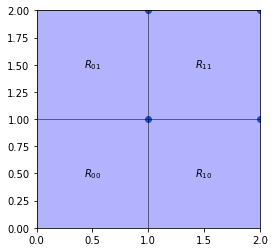

In [9]:
plotRectangleList(0,2,0,2,2,NEPoints) #displays the region as well as the northeast point in each subregion

Now, knowing that the function northEastGenerator correctly identifies the northeast points of each subarea, we only have to modify our function slightly in order to computer the volume between the surface, S, and the region, R. We simply modify our code slighly to multiply by $\Delta x$ and $\Delta y$, at every point, f(x,y) on the surface.

In [12]:
def riem_sum_ne(f,a,b,c,d,n):
    '''An approximation of the integral of f over domain (a,b) x (c,d) by n^2 rectangles, using the northeastern most
    point of each rectangle'''
    dx = (b-a) / n
    dy = (d-c) / n
    return sum([f(a + i * dx,c + j * dy) for i in range(1,n+1) for j in range(1,n+1)])*dx*dy

In [13]:
NEestimate = riem_sum_ne(z_func,0,2,0,2,2)
NEestimate

533.0

We can check the accuracy of our answer by performing the actual integration, $$∫_a^b∫_c^df(x,y)  dydx=∫_0^2∫_0^215-xy^2+4(x+4)^2  dydx$$

The following function returns the integral above, along with the approximate error of the integration (~0)

In [14]:
from scipy.integrate import dblquad
area = dblquad(lambda x, y: 15-x*y**2+4*(x+4)**2, 0, 2, 0, 2)
area

(460.0, 5.10702591327572e-12)

Notice how the estimate of the volume, 533, is substantially different from the true volume of 460. However, as the number of subareas that R is divided into increases, the estimate approaches 460. Confirm this for yourself by changing the value of n in riem_sum_ne and/or northEastViz

Another way to check the accuracy of our estimation is to plot the colormap produced by our estimation, side-by-side with the colormap produced by the actual function f(x,y)

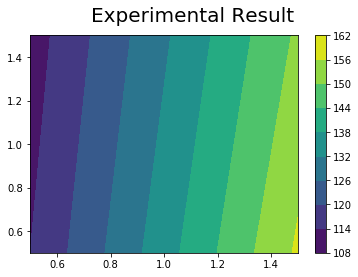

In [15]:
%run "Color Map Functions.ipynb"
colorMapList(z_func,0,2,0,2,2,NEPoints)

<Figure size 432x288 with 0 Axes>

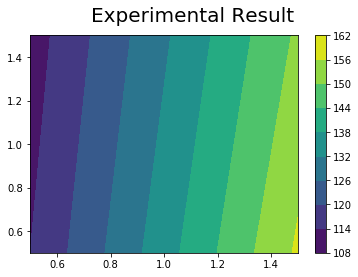

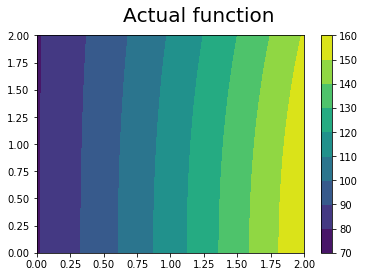

In [16]:
%run "Color Map Functions.ipynb"
compare(z_func,0,2,0,2,2,NEPoints)

### Picking a Point to Use for Estimations

In the example above, we picked the northeast point of each subarea to calculate an estimate of the volume of the surface, but we could have picked other points - the southeast point, the southwest point, or the northwest point, for example.

Let's see what happens when we try and find the same volume using each of these different point-picking schemes.

#### Southeast Point

In the case that our domain, the rectangle $[a,b]\times [c,d]$ is divided into $n^2$ subrectangles and we use the "southeast" corner of each rectangle as our sample point, this can be further specified with $\Delta x = \frac{b-a}{n}, \Delta y = \frac{d-c}{n}$,  

$$\sum_{i=1}^n \sum_{j=0}^{n-1} f\left( a + i \Delta x,c + j \Delta y \right) \Delta x \Delta y$$

Notice that the only difference between selecting the southeast and northeast points lies in the indexing - when selecting the northeast point, j varies from 1 to n, while in the southeast point, j varies from 0 to n.

Armed with this knowledge, we can generate the points at the southeastern corner of each subarea using the function below:

In [17]:
def southEastGenerator(a,b,c,d,n):
    """Returns a dataframe of the southeastern points of each subrectangle on the region [a,b] x [c,d] with
    n^2 subareas"""
    w = b - a
    h = d - c
    dx = w / n
    dy = h / n
    xVals = []
    yVals = []
    for i in range(1,n+1):
        for j in range(n): #notice change in range here
            xVals.append(a + (i * dx))
            yVals.append(c + (j * dy))
    d = {'x' : xVals, 'y': yVals}
    generatedPoints = pd.DataFrame(data = d)
    return generatedPoints

In [18]:
#test to make sure this is correct
SEPoints = southEastGenerator(0,2,0,2,2)
SEPoints

,x,y
0,1.0,0.0
1,1.0,1.0
2,2.0,0.0
3,2.0,1.0


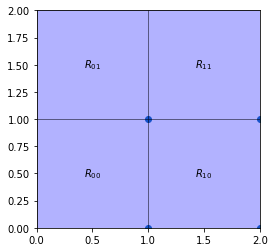

In [19]:
plotRectangleList(0,2,0,2,2,SEPoints)

<Figure size 432x288 with 0 Axes>

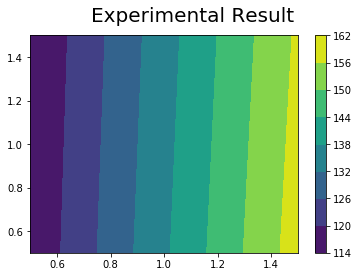

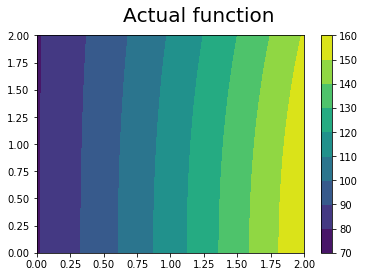

In [21]:
compare(z_func,0,2,0,2,2,SEPoints) #whole issue with relativity here - need color bar!!

#### Exercise 1

Fill in the code in the function below in order to create a function riem_sum_se(a,b,c,d), which returns an approximation of the integral of f over domain (a,b) x (c,d) by n^2 rectangles, using the southeast point of each rectangle. This looks very similar to the riem_sum_ne function - the only difference is the range of its j indices

In [22]:
def riem_sum_se(f,a,b,c,d,n):
    '''An approximation of the integral of f over domain (a,b) x (c,d) by n^2 rectangles, using the southeastern most
    point of each rectangle'''
    dx = (b-a) / n
    dy = (d-c) / n
    return sum([f(a + i * dx,c + j * dy) for i in range(1,n+1) for j in range(n)])*dx*dy #write this line
#answer: sum([f(a + i * dx,c + j * dy) for i in range(1,n+1) for j in range(n)])*dx*dy

You can run the function to test your code - your answer should be SOMEWHERE around 460 (but it could be a large over or understimate, since n is so small - try increasing n!)

In [23]:
SEestimate = riem_sum_se(z_func,0,2,0,2,2)
SEestimate

545.0

#### Northwest Point

In the case that our domain, the rectangle $[a,b]\times [c,d]$ is divided into $n^2$ subrectangles and we use the "northwest" corner of each rectangle as our sample point, this can be further specified with $\Delta x = \frac{b-a}{n}, \Delta y = \frac{d-c}{n}$,  

$$\sum_{i=0}^{n-1} \sum_{j=1}^{n} f\left( a + i \Delta x,c + j \Delta y \right) \Delta x \Delta y$$

#### Exercise 2

Armed with the knowledge above, fill in the code in both the functions northWestGenerator and riem_sum_nw

In [24]:
def northWestGenerator(a,b,c,d,n):
    """Returns a dataframe of the northwestern points of each subrectangle on the region [a,b] x [c,d] with
    n^2 subareas"""
    w = b - a
    h = d - c
    dx = w / n
    dy = h / n
    xVals = []
    yVals = []
    for i in range(n): #would fill in code here
        for j in range(1,n+1):
            xVals.append(a + (i * dx))
            yVals.append(c + (j * dy))
    d = {'x' : xVals, 'y': yVals}
    generatedPoints = pd.DataFrame(data = d)
    return generatedPoints

In [25]:
NWPoints = northWestGenerator(0,2,0,2,2)
NWPoints

,x,y
0,0.0,1.0
1,0.0,2.0
2,1.0,1.0
3,1.0,2.0


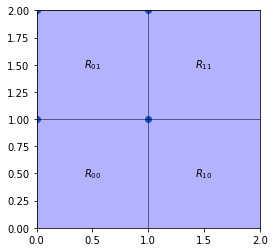

In [26]:
plotRectangleList(0,2,0,2,2,NWPoints)

<Figure size 432x288 with 0 Axes>

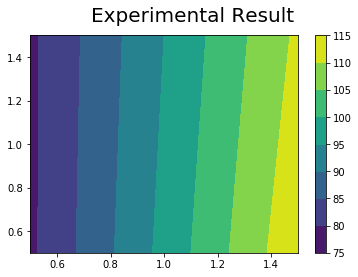

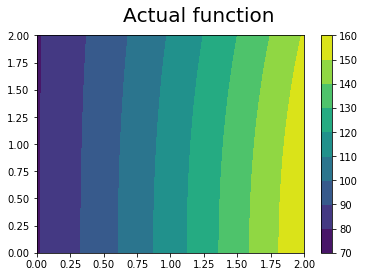

In [27]:
compare(z_func,0,2,0,2,2,NWPoints) #whole issue with relativity here - need color bar!!

In [28]:
def riem_sum_nw(f,a,b,c,d,n):
    '''An approximation of the integral of f over domain (a,b) x (c,d) by n^2 rectangles, using the northwestern most
    point of each rectangle'''
    dx = (b-a) / n
    dy = (d-c) / n
    return sum([f(a + i * dx,c + j * dy) for i in range(n) for j in range(1,n+1)])*dx*dy #write this line

In [29]:
NWestimate = riem_sum_nw(z_func,0,2,0,2,2)
NWestimate

383.0

#### Southwest Point

In the case that our domain, the rectangle $[a,b]\times [c,d]$ is divided into $n^2$ subrectangles and we use the "northwest" corner of each rectangle as our sample point, this can be further specified with $\Delta x = \frac{b-a}{n}, \Delta y = \frac{d-c}{n}$,  

$$\sum_{i=0}^{n-1} \sum_{j=0}^{n-1} f\left( a + i \Delta x,c + j \Delta y \right) \Delta x \Delta y$$

#### Exercise 3

Finish writing the code for southWestGenerator and riem_sum_sw

In [30]:
def southWestGenerator(a,b,c,d,n):
    """Returns a dataframe of the southwestern points of each subrectangle on the region [a,b] x [c,d] with
    n^2 subareas"""
    w = b - a
    h = d - c
    dx = w / n
    dy = h / n
    xVals = []
    yVals = []
    for i in range(n): #would fill in code here
        for j in range(n):
            xVals.append(a + (i * dx))
            yVals.append(c + (j * dy))
    d = {'x' : xVals, 'y': yVals}
    generatedPoints = pd.DataFrame(data = d)
    return generatedPoints

In [31]:
SWPoints = southWestGenerator(0,2,0,2,2)
SWPoints

,x,y
0,0.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,1.0


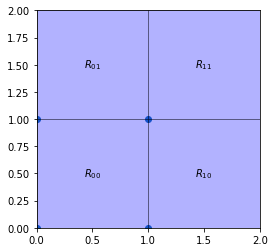

In [32]:
plotRectangleList(0,2,0,2,2,SWPoints)

<Figure size 432x288 with 0 Axes>

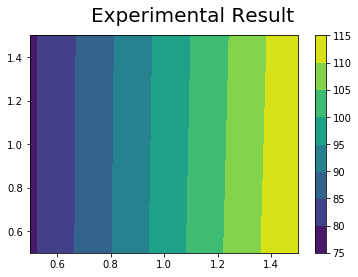

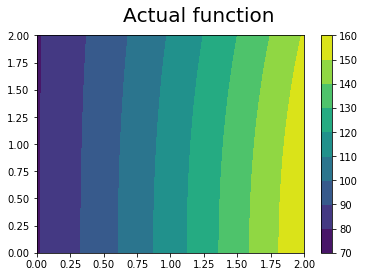

In [33]:
compare(z_func,0,2,0,2,2,SWPoints) #whole issue with relativity here - need color bar!!

In [34]:
def riem_sum_sw(f,a,b,c,d,n):
    '''An approximation of the integral of f over domain (a,b) x (c,d) by n^2 rectangles, using the southwestern most
    point of each rectangle'''
    dx = (b-a) / n
    dy = (d-c) / n
    return sum([f(a + i * dx,c + j * dy) for i in range(n) for j in range(n)])*dx*dy #write this line

In [35]:
SWestimate = riem_sum_sw(z_func,0,2,0,2,2)
SWestimate

387.0

### Different Methods of Selecting Points

In the exercises above, we saw how to estimate the volume between a surface, S, and a region, R, by dividing R into subareas and using the northeastern, southeastern, northwestern, and southwestern points of each subarea to estimate the double integral. 

However, there are other ways of picking points. For example, we could have picked the point at the center of each region, or randomly picked a point in each subarea.

#### Randomly picking points

Run the line of code below to generate 4 random points within the region R = [0,2] x [0,2] - each point will be randomly selected from one of the 4 subareas of R.

In [36]:
subAreaRandomPoints = subAreaRandomGenerator(0,2,0,2,2)

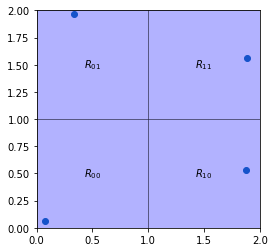

In [37]:
plotRectangleList(0,2,0,2,2,subAreaRandomPoints)

Let's calculate the value of the surface we've been working with, $z = 15 - xy^2 + 4(x+4)^2$ for each of the random points we calculated. Run the lines of code below to do so.

In [38]:
subAreaRandomPoints['z'] = z_func(subAreaRandomPoints.x,subAreaRandomPoints.y)
subAreaRandomPoints

,x,y,z
0,0.074950,0.062128,81.420566
1,0.333658,1.962030,88.837938
2,1.876220,0.530939,152.590933
3,1.881269,1.562910,148.761953


We can compare the colormaps, as shown below:

<Figure size 432x288 with 0 Axes>

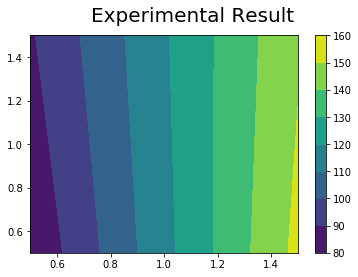

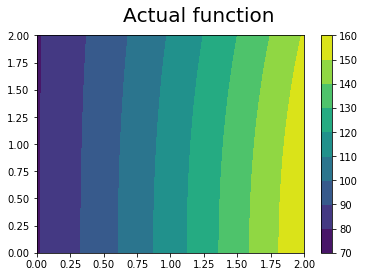

In [39]:
compare(z_func,0,2,0,2,2,subAreaRandomPoints)

In [40]:
randomSubAreaEstimate = volumeEstimate(0,2,0,2,2,z_func,subAreaRandomPoints)
randomSubAreaEstimate

471.6113902341661

#### Picking a point at the center of each subarea

Above, we estimated the volume of the solid by picking a random point in each subarea, but a more consistent method of point selection would be to pick a point at the center of each subarea.

Run the lines of code below to generate 4 points in the center of each subarea within R.

In [41]:
centerPoints = centerSubAreaGenerator(0,2,0,2,2)
centerPoints

,x,y
0,0.5,0.5
1,0.5,1.5
2,1.5,0.5
3,1.5,1.5


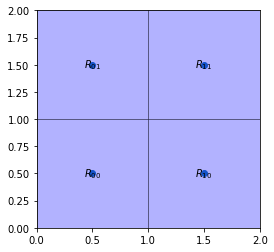

In [42]:
plotRectangleList(0,2,0,2,2,centerPoints)

Let's calculate the value of the surface we've been working with, $z = 15 - xy^2 + 4(x+4)^2$ for each of the center points we calculated. Run the lines of code below to do so.

In [43]:
centerPoints['z'] = z_func(centerPoints.x,centerPoints.y)
centerPoints

,x,y,z
0,0.5,0.5,95.875
1,0.5,1.5,94.875
2,1.5,0.5,135.625
3,1.5,1.5,132.625


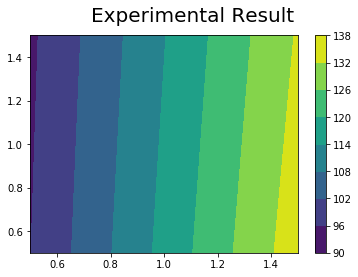

In [44]:
%run "Color Map Functions.ipynb"
colorMapList(z_func,0,2,0,2,2,centerPoints)

<Figure size 432x288 with 0 Axes>

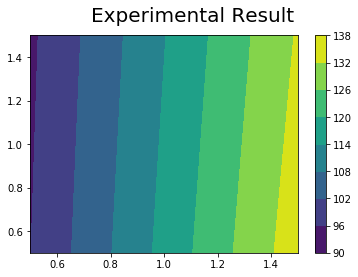

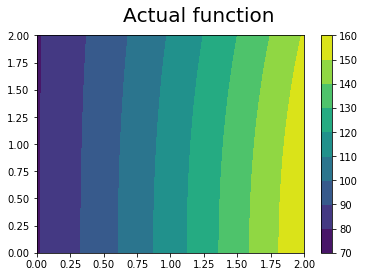

In [45]:
compare(z_func,0,2,0,2,2,centerPoints)

In [46]:
centerSubAreaEstimate = sum(centerPoints['z'])
centerSubAreaEstimate

459.0

#### Exercise 4 -  Using the Trapezoid Rule in 2-D

Another way of estimating the volume between R and the surface is by applying the trapezoid rule in 2 dimensions. Doing so provides a first-order approximation, rather than a constant approximation, meaning that the answer is based off a linear approximation, so it is more accurate. This method involves taking the average of all 4 points of a subrectangle and multiplying this average by the $\Delta x$ and $\Delta y$ in order to estimate the volume of the soolid between the surface and the region at the subrectangle. Repeat this process for all subrectangles and add the results together in order to estimate the volume. See the following diagram and explanation for more information: https://pdfs.semanticscholar.org/07c8/98746acb0aeea5632defaea8271f845180fa.pdf#page=9

Modify the code below in order to return a function that returns the volume between the a region R and a surface S, using the trapezoid rule.

In [47]:
def trap_rule(f,a,b,c,d,n):
    """Approximates the volume between the region [a,b] x [c,d] and the surface f, where the region is split into n^2
    equal subareas, uses the trapezoid rule"""
    dx = (b-a) / n
    dy = (d-c) / n
    ans = 0
    for i in range(n):
        for j in range(n):
            ans += sum([f(a+i*dx,c+j*dy),f(a+(i+1)*dx,c+j*dy),f(a+i*dx,c+(j+1)*dy),f(a+(i+1)*dx,c+(j+1)*dy)]) #comment out
    trapEstimate = ans/4 * dx * dy
    return trapEstimate

Running the function below, should return a number somewhere around approx 460.

In [49]:
trapEstimate = trap_rule(z_func, 0, 2, 0, 2, 2)
trapEstimate

462.0

### Estimates side by side

So far, we've used 7 different ways to estimate the volume of solid between the surface S and the region R. Let's compare these estimates side-by-side to determine the accuracy of the different methods.

Run the lines of code below to get a side-by-side comparison of all the methods used so far.

In [50]:
data = {'Type':['NE', 'SE', 'NW', 'SW', 'Random', 'Center', 'Trapezoid'],
        'Estimate':[NEestimate, SEestimate, NWestimate, SWestimate, randomSubAreaEstimate, centerSubAreaEstimate, trapEstimate],
       'Actual Answer:' : [460,460,460,460,460,460,460], 'Error:' : [NEestimate-460, SEestimate-460,
                                                                 NWestimate-460, SWestimate-460,
                                                                randomSubAreaEstimate-460,
                                                                    centerSubAreaEstimate-460, trapEstimate - 460]}
#minValue = min([northEastEstimate-460, southEastEstimate-460, northWestEstimate-460, southWestEstimate-460,
                                                                #randomEstimate-460, centerEstimate-460])
#could maybe algorithmize this more, so if the random one was actually closer it'd show that
df = pd.DataFrame(data)
df

,Type,Estimate,Actual Answer:,Error:
0,NE,533.00000,460,73.00000
1,SE,545.00000,460,85.00000
2,NW,383.00000,460,-77.00000
3,SW,387.00000,460,-73.00000
4,Random,471.61139,460,11.61139
5,Center,459.00000,460,-1.00000
6,Trapezoid,462.00000,460,2.00000


Notice how close the center approximation is in this case. Unless you were extremely lucky with your random points, the center method was probably the most accurate - it was only 1 off the actual result! Note that the trapezoid approximation is very close to the answer as well, as it is a second order method of numerical integration.

### Contour Plots
Enter 'SW', 'NW', 'SE', 'NE', 'NW', 'random', or 'center' and change the n value to see how the graph changes

In [84]:
%run "Color Map Functions.ipynb"
interact(colorMapListv1,f = fixed(z_func), a = fixed(0), b = fixed(2), c = fixed(0), d = fixed(2), n = (1,40), direction = 'SW')

interactive(children=(IntSlider(value=20, description='n', max=40, min=1), Text(value='SW', description='direc…

<function __main__.colorMapListv1(f, a, b, c, d, n, direction)>

## Estimating volume when the function is not known (WIP)

Oftentimes in real life, we might not know a function, and thus cannot integrate it, so an estimate can suffice.
Consider the following surface, S, for example, whose formula is unknown:

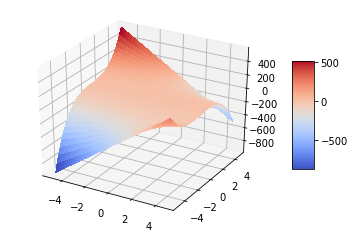

In [85]:
graphSurface(q_func)

Imagine we are faced with the same problem as before - finding the volume between an area $R = [0,2] x [0,2] $ and this surface S = q_func(x,y), where q_func(x,y) is unknown.

<b> Note: </b> For the purposes of comparing your answer to the correct answer, the answer is 36.

Use the function below to generate a set of 15 points over the region R

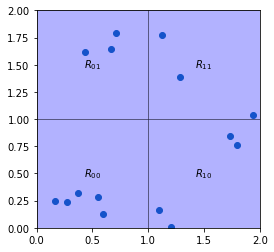

In [86]:
#should maybe include docstrings of these functions in this notebook, so students know how they can run the function
#with different parameters
uniformRandomList = uniformRandomGenerator(0,2,0,2,15)
plotRectangleList(0,2,0,2,2,uniformRandomList) #plot the randomly generated points

We now have 15 randomly generated points across the region R. However, as before, we want to <i> only use 4 points </i> across the region to estimate our answer.

So, how do we pick our 4 points?

Well, first let's look at our points. Run the line of code below to view the points you randomly generated.

In [87]:
uniformRandomList

,x,y
0,1.943446,1.033777
1,0.437797,1.613658
2,0.711194,1.787182
3,1.098795,0.164944
4,0.549706,0.280222
5,0.166232,0.246508
6,0.591328,0.122867
7,1.205999,0.006861
8,1.792422,0.757932
9,1.736719,0.840991


Ideally, with these 4 points that we are going to pick, we want to represent each subarea equally, so one subarea doesn't count for more than another. Thus, it makes sense to pick a point in each subarea. But which point in each subarea do we pick?

From the previous exercise, it's clear the picking points at extreme corners (NW, NE, SW, SE) often gives a result that is off from the target value, unless a very high n value is used. So, since our n value is low (only 2) it doesn't seem logical to pick the point closest to the an extreme corner.

However, picking the point closest to the center seemed to work well for purposes of estimation. Picking a point at random also seemed pretty effective.

Let's try picking points both at random and closest to the center.

<b> But wait </b> How can we ensure that we only pick one point in each subarea?
We need a <i> filter </i> which will return all the points in the subarea that is in the ith column and jth row of an n x n grid of subrectangles.

#### Exercise #5 - Making a filter

Modify the code below to act as filter.

In [88]:
%run Distance.ipynb
def filterbox(data,a,b,c,d,i,j,n):
    """This function takes a list of points in the rectangle [a,b] x [c,d] and returns all the points in the subrectangle
    in the ith column and jth row of an n x n grid of subrectangles."""
    w = b - a
    h = d - c
    dx = w/n
    dy = h/n
    xcoord = a + i*dx  # the x-coordinate of the bottom-left corner of the subrectangle
    ycoord = c + j*dy  # the y-coordinate of the bottom-left corner of the subrectangle
    return data[ (xcoord <= data.x) & (xcoord + dx > data.x) & (ycoord <= data.y) & (ycoord + dy > data.y)]
#     return (a <= data.x) & (a + dx > data.x) & (b <= data.y) & (b + dy > data.y)

Now that we have a filter, it will be a lot easier to search for points within specific subareas. We can simply see, using the filter, if there are any points in a certain subregion.

However, there is still a problem: what do we do if there are no points in a subregion? We can't simply ignore it, because we want to try and account for all subregions to the best of our ability.

One method is to pick the point which is closest to the subregion, and use that point to estimate the volume between the subregion and the surface. Note that this using this method makes it possible for you to end up with two of the same points. For example, if you randomly pick a point in a subregion and that point also ends up being closest to a subregion with no points, then that point will be used twice.

In [89]:
def randFunc(data,a,b,c,d,n):
    """Input: a region [a,b] x [c,d], with points, data, on it.
       Output: a list of randomly picked points in each subarea - if no points in a subarea, uses point closest
       to that subarea"""
    w = b - a
    h = d - c
    df = pd.DataFrame()
    OldX = []
    OldY = []
    for i in range(n):
        for j in range(n):
            data1 = filterbox(data,a,b,c,d,i,j,n)
            centerx = (((w/n)*(i+1)+(w/n)*(i))/2)+a
            centery = (((h/n)*(j+1)+(h/n)*(j))/2)+c
            if data1.empty:
                closest = (closestDistance(centerx,centery,data))
                estimatePoint = data.iloc[closest]
                df = df.append(estimatePoint, ignore_index = True)
                OldX.append(centerx)
                OldY.append(centery)
            else:
                OldX.append(centerx)
                OldY.append(centery)
                sus = data1.sample()
                df = df.append(sus, ignore_index = True)
    dfOld = pd.DataFrame({'Old X': OldX, 'Old Y': OldY})
    return df.join(dfOld)

In [90]:
uniformRandomList

,x,y
0,1.943446,1.033777
1,0.437797,1.613658
2,0.711194,1.787182
3,1.098795,0.164944
4,0.549706,0.280222
5,0.166232,0.246508
6,0.591328,0.122867
7,1.205999,0.006861
8,1.792422,0.757932
9,1.736719,0.840991


In [91]:
generatedList = randFunc(uniformRandomList,0,2,0,2,2)

In [92]:
generatedList

,x,y,Old X,Old Y
0,0.270589,0.239736,0.5,0.5
1,0.711194,1.787182,0.5,1.5
2,1.736719,0.840991,1.5,0.5
3,1.288280,1.388437,1.5,1.5


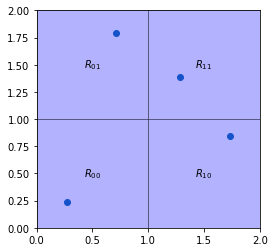

In [93]:
plotRectangleList(0,2,0,2,2,generatedList)

In [94]:
volumeEstimate(0,2,0,2,2,q_func,generatedList)

36.205893559503565

A good way to visualize how accurate how estimate is, would be to plot the filled-in contour plots for the surface we are generating, mystery_func, and the surface we have generated based on the points we were given of mystery_func. The more similar the two countour plots (color maps) are, the better our estimation is.

Consider the color map for the mystery function:

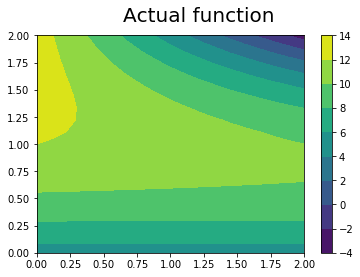

In [95]:
colorMap(q_func)

Compare it to the color map of the list of points we just generated:

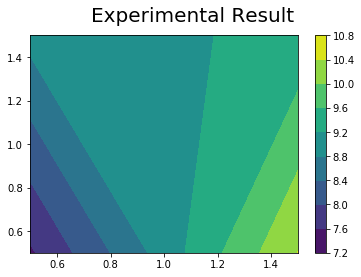

In [98]:
colorMapList(q_func,0,2,0,2,2,generatedList)

### Selecting the closest point to the center in each subarea

Another strategy involves selecting points in each subarea more methodically, rather than randomly. Ideally, picking a point closest to the center of each subarea would provide a better approximation than picking points randomly in each subarea (especially for smaller values of n), so we could write an algorithm to do so.

In [99]:
def bruteForce(data,a,b,c,d,n):
    """Input: a region [a,b] x [c,d], with points, data, on it.
       Output: a list of points closest to the center of each subarea - if no points in a subarea, uses point closest
       to that subarea"""
    w = b - a
    h = d - c
    df = pd.DataFrame()
    center = []
    OldX = []
    OldY = []
    for i in range(n):
        for j in range(n):
            centerx = (((w/n)*(i+1)+(w/n)*(i))/2)+a
            centery = (((h/n)*(j+1)+(h/n)*(j))/2)+c
            data1 = filterbox(data,a,c,w,h,i,j,n)
            OldX.append(centerx)
            OldY.append(centery)
            if data1.empty:
                closest = (closestDistance(centerx,centery,data))
                estimatePoint = data.iloc[closest]
                df = df.append(estimatePoint, ignore_index = True)
            else:
                closest = (closestDistance(centerx,centery,data))
                estimatePoint = data.iloc[closest]
                df = df.append(estimatePoint, ignore_index = True)
    dfOld = pd.DataFrame({'Old X': OldX, 'Old Y': OldY})
    return df

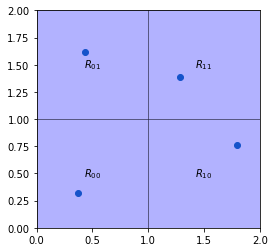

In [100]:
brutePointsList = bruteForce(uniformRandomList,0,2,0,2,2)
plotRectangleList(0,2,0,2,2,brutePointsList)

In [101]:
volumeEstimate(0,2,0,2,2,q_func,brutePointsList)

38.952028120343485

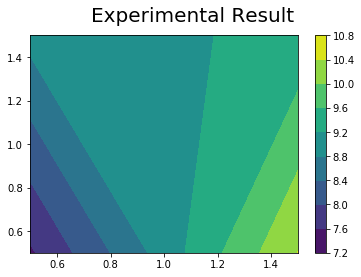

In [102]:
%run "Color Map Functions.ipynb"
colorMapList(q_func,0,2,0,2,2,generatedList)

## Mesh Analysis

Another method for estimating the volume between the surface and the region involves splitting a region recursively into smaller subareas, and trying to minimize the length of each subarea, while keeping a point in each subarea (or, if there are no points in a subarea, estimating a value for the subarea based on a nearby points) Such a mesh analysis can increase the accuracy of our estimate, since we will obtain a higher n values.

Consider the following function, which generates a set of uniformly distributed points on a region:

In [189]:
uniformPoints = uniformRandomGenerator(0,2,0,2,100)

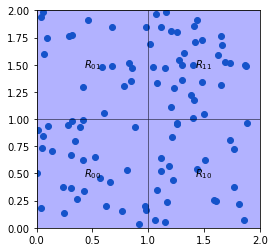

In [190]:
plotRectangleList(0,2,0,2,2,uniformPoints)

### Different Mesh Refinement Algorithms

How could we refine the rectangle above? Perhaps the simplest method would be to successively increase n values until we reach an n value at which a subarea is empty. Return the n value before this n-value, because it will be the largest n-value possible where each subarea has at least one point. If there is only one point in a subarea, we can use that for our estimate, but if there are multiple, we can pick the point closest to the center.

This method of mesh analysis is relatively simple and can be implemented as follows:

In [191]:
def basicMeshAnalysis(a,b,c,d,pointsList):
    """Return the maximum n for which a uniform n x n grid has a data point in each subrectangle"""
    w = b - a
    h = d - c
    n = 1
    while n < 10000: #prevents recursion overload
        dx = w/n
        dy = h/n
        for i in range(n):
            for j in range(n):
                subarea = filterbox(pointsList,a,b,c,d,i,j,n)
                if subarea.empty:
                    return n-1
        n += 1
    return n

But, let's check if it works! Run the line below to generate the maximum value of n for your randomly generated points that will guarantee an n x n grid that has a data point in each subrectangle.

In [192]:
n = basicMeshAnalysis(0,2,0,2,uniformPoints)
n

5

Check to see that your value of n is correct:

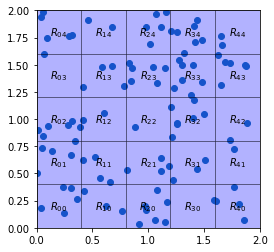

In [193]:
plotRectangleList(0,2,0,2,n,uniformPoints)

Notice how every single subarea has at least 1 point in it. If you increase the value of n by 1 (try it if you don't belive me!) there will be at least one subarea without a point.

Some subareas have multiple points in them, so we need to find a way to select points for these subareas - the approximation wherein we chose the point closest to the center in each subarea seemed to be effective last time, so lets do the same thing!

In [194]:
points = bruteForce(uniformPoints,0,2,0,2,n)

In [195]:
volumeEstimate(0,2,0,2,n,q_func,points)

35.98434309106294

Notice how the value of the estimate we obtained here is very close to the actual answer, since our value of n is relatively high.

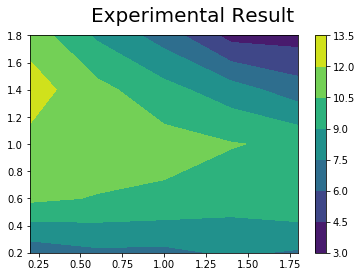

In [196]:
colorMapList(q_func,0,2,0,2,n,points) #this one is good

Why, however, is our value of n so high in this case? Why were we able to divide our region into so many subareas? The answer lies in the fact that our data, though randomly generated, was generated <i> uniformly</i>, so there are about the same number of points in each subarea, meaning the region can be split up into more subareas with points.

What if we were to generate our data <i> non</i>-uniformly so that the data was clustered in points around the region? Doing so would make this strategy of mesh analysis much poorer because we would be able to split the region in many fewer subareas since the points are not uniformly distributed.

For example, consider the following code which generates random points in clusters:

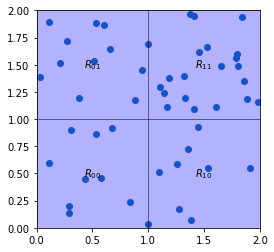

In [231]:
clusterList = uniformRandomGenerator(0,2,0,2,50)
plotRectangleList(0,2,0,2,2,clusterList) #plot rectangle with scattered cluster

If we run the same mesh analysis on this plot, we will get a much smaller value of n, and thus a worse estimate for the volume between the area and the surface

In [232]:
n = basicMeshAnalysis(0,2,0,2,clusterList)
n #can show how this gives you a worse volume estimate

3

In [233]:
points = bruteForce(uniformPoints,0,2,0,2,n)
volumeEstimate(0,2,0,2,n,q_func,points)

34.40778641729892

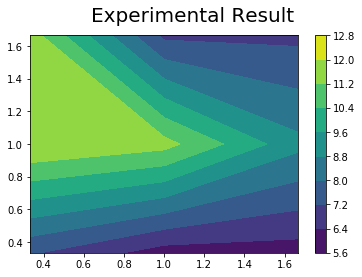

In [235]:
colorMapList(q_func,0,2,0,2,n,points)

#### Recursively Dividing the x-axis

Another strategy involves recursively dividing the region in half along the x axis, based on whether doing so would result in any points remaining in the subarea.

In order to do this, we need to modify our filter slightly, so that it returns all the values in an area, based on the x-values (the i index) and indepent of the y-values (the j index).

Consider the modified filter below:

In [236]:
def filterbox_x(data,a,b,c,d,i,n):
    """This function takes a list of points in the rectangle [a,b] x [c,d] and returns all the points in the subrectangle
    in the ith column of an n x n grid of subrectangles."""
    w = b - a
    h = d - c
    dx = w/n
    dy = h/n
    xcoord = a + i*dx  # the x-coordinate of the bottom-left corner of the subrectangle
    return data[ (xcoord <= data.x) & (xcoord + dx > data.x)]

In [237]:
def MeshAnalysis_x(a,b,c,d,points):
    """Recursively splits x-axis in half in the region [a,b] x [c,d]
    until doing so would result in only 1 dot in a subregion"""
    w = b - a
    h = d - c
    mid = a + w/2
    side1 = points[points.x < mid]
    side1 = side1.sort_values(by=['x'])
    side2 = points[points.x >= mid]
    side2 = side2.sort_values(by=['x'])
    if side1.empty or side2.empty:
        return []
    else:
        return MeshAnalysis_x(a,b/2,c,d,side1) + [mid] + MeshAnalysis_x(a+w/2,b,c,d,side2)

Now, let's generate a series of vertical lines that divide the region according to this mesh analysis method:

In [365]:
verticalLines = MeshAnalysis_x(0,2,0,2,clusterList)

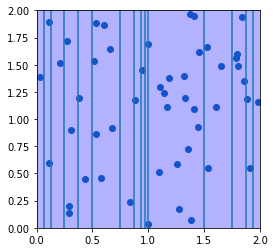

In [366]:
%run "2D Rectangle Plotting Functions.ipynb"
verticalLineGraph(0,2,0,2,verticalLines,clusterList)

The following function does several things. It first picks the closest point in each subarea to the center of the subarea. It then multiplies the value of the function at that point by the area of the subarea. It does this for every subarea and returns an estimate of the volume between the region R and the surface S based on this. Notice the points picked, in the table the function displays.

In [367]:
%run "Volume Estimation.ipynb"
values =  MeshXVolumeEstimator(q_func,verticalLines,clusterList,0,2,0,2)
values

41.788800897011896


,x,y,Old X,Old Y
0,0.033483,1.391200,0.031250,1.0
1,0.110347,0.592700,0.093750,1.0
2,0.211539,1.513169,0.187500,1.0
3,0.305523,0.897150,0.312500,1.0
4,0.383365,1.197337,0.437500,1.0
5,0.680140,0.915111,0.625000,1.0
6,0.836184,0.237495,0.812500,1.0
7,0.880878,1.177040,0.906250,1.0
8,0.947916,1.455625,0.953125,1.0
9,0.999828,1.690210,0.984375,1.0


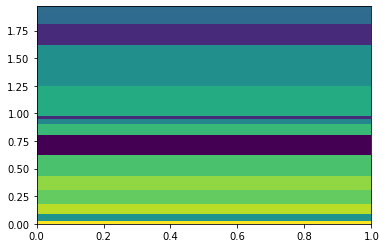

In [368]:
%run "Color Map Functions.ipynb"
colorize(q_func, values,0,2,0,2) #this has problems

# Add contour plots here

#### Recursively Dividing the y-axis

The counter-part to the method of mesh-analysis above is recursively dividing the y-axis in a similar fashion to how we recursively divided the x-axis.

Once again, we need to modify our filter, so that it returns all the values in an area, based on the y-values (the j index) and indepent of the x-values (the i index).

In [369]:
def filterbox_y(data,a,b,c,d,j,n):
    """This function takes a list of points in the rectangle [x,x+w] x [y,y+h] and returns all the points in the subrectangle
    in the jth column of an n x n grid of subrectangles."""
    w = b - a
    h = d - c
    dx = w/n
    dy = h/n
    ycoord = c + j*dy  # the y-coordinate of the bottom-left corner of the subrectangle
    return data[ (ycoord <= data.y) & (ycoord + dy > data.y)]

In [370]:
def MeshAnalysis_y(a,b,c,d,points):
    """Recursively splits y-axis in half in the region [a,b] x [c,d]
    until doing so would result in only 1 dot in a subregion"""
    w = b - a
    h = d - c
    mid = c + h/2
    side1 = points[points.y < mid]
    side1 = side1.sort_values(by=['y'])
    side2 = points[points.y >= mid]
    side2 = side2.sort_values(by=['y'])
    if side1.empty or side2.empty:
        return []
    else:
        return MeshAnalysis_y(a,b,c,d/2,side1) + [mid] + MeshAnalysis_y(a,b,c+h/2,d,side2)

Now, let's generate a series of horizontal lines that divide the region according to this mesh analysis method:

In [371]:
horizontalLines = MeshAnalysis_y(0,2,0,2,clusterList)
horizontalLines

[0.0625,
 0.125,
 0.1875,
 0.21875,
 0.25,
 0.5,
 0.75,
 0.875,
 1.0,
 1.5,
 1.75,
 1.875,
 1.9375]

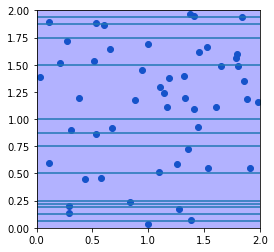

In [372]:
%run "2D Rectangle Plotting Functions.ipynb"
horizontalLineGraph(0,2,0,2,horizontalLines,clusterList)

In [373]:
%run "Volume Estimation.ipynb"
MeshYVolumeEstimator(q_func,horizontalLines,clusterList,0,2,0,2)

36.26430614094392


,x,y,Old X,Old Y
0,0.995438,0.030855,1.0,0.031250
1,1.383270,0.072045,1.0,0.093750
2,1.278170,0.176745,1.0,0.156250
3,0.291583,0.201863,1.0,0.203125
4,0.836184,0.237495,1.0,0.234375
5,0.577854,0.456646,1.0,0.375000
6,1.100733,0.516529,1.0,0.625000
7,0.529661,0.858397,1.0,0.812500
8,0.680140,0.915111,1.0,0.937500
9,1.107973,1.297645,1.0,1.250000


### A "Smarter Way"

In the examples above, we recursively divided the x or y axis in a mechanical way, but didn't consider if it was more beneficial to split the region along the x-axis or along the y-axis at each step of the way. 

We should split the region in half vertically if doing so leaves a more equal distribution of points on either side of the line, and we should split the region in half horizontally if doing so leaves a more equal distribution of points on either side of the line. If we repeat this process over and over, we should get a better estimate.

In [374]:
uniformPoints = uniformRandomGenerator(0,2,0,2,50)

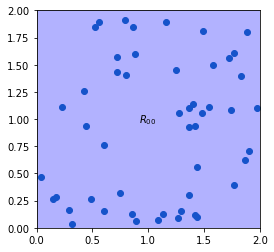

In [375]:
plotRectangleList(0,2,0,2,1,uniformPoints)

In [376]:
def smartBoundaries(a,b,c,d,points,xs,ys): #this method would work properly if the x and y methods worked
    """Determines, each time the region is split in half, whether it is smarter to split the region in half
    vertically or horizontally, and does so
    returns a list of x and y boundaries"""
    #NOTE: If properly coded, each square should have at least one point in it
    w = b - a
    h = d - c
    
    #first see how many points are on each side if you split the region 
    midx = a + w/2
    side1x = points[points.x < midx] #all points on left of vertical line
    side1x = side1x.sort_values(by=['x'])
    side2x = points[points.x >= midx] #all points on right of vertical line
    side2x = side2x.sort_values(by=['x'])
    lengthDifferencex = math.fabs(len(side2x) - len(side1x)) #smaller diff = closer to equal amounts of points on both sides
    
    #now, test number of points by splitting region with horizontal lines
    midy = c + h/2
    side1y = points[points.y < midy] #all points below horizontal line
    side1y = side1y.sort_values(by=['y'])
    side2y = points[points.y >= midy] #all points above horizontal line
    side2y = side2y.sort_values(by=['y'])
    lengthDifferencey = math.fabs(len(side2y) - len(side1y)) #smaller dif = closer to equal amounts of points on both sides
    if(lengthDifferencex <= lengthDifferencey):
        if(b/2 not in xs):
            xs.insert(len(xs)//2,b/2)
        if filterboxv3(points,xs,ys) == 0: #if there are any empty boxes, STOP
            return []
        else:
            #otherwise, repeat
            return smartBoundaries(a,b/2,c,d,points,xs,ys) + [[midx,"x"]]  + smartBoundaries(a+w/2,b,c,d,points,xs,ys)
        
    if(lengthDifferencey < lengthDifferencex):
        if(c/2 not in ys):
            
            ys.insert(len(ys)//2,c/2)
            
        if filterboxv3(points,xs,ys) == 0:
            return []
        
        else:
            return smartBoundaries(a,b,c,d/2,points,xs,ys) + [[midy,"y"]] + smartBoundaries(a,b,c+h/2,d,points,xs,ys)            
            

In [378]:
boundaries = smartBoundaries(0,2,0,2,uniformPoints,[0,2],[0,2])

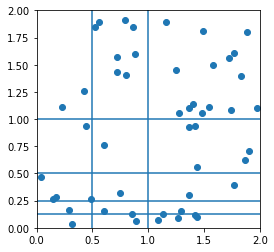

In [379]:
%run "2D Plotting.ipynb"
lineGrapher(0,2,0,2,sus,uniformPoints)

In [380]:
def filterboxv4(data,xvals,yvals,a,b,c,d): #can make more descriptive names here
    """
    Parameters:
    data - a list of points
    xvals - x coordinates representing vertical lines
    yvals - y coordinates representing horizontal lines
    a,b,c,d are numbers to represent the region [a,b] x [c,d]
    
    Returns a list of points; each point is the point closest to the center of each box in the region [a,b] x [c,d]
    """
    xvals = xvals.tolist()
    yvals = yvals.tolist()
    #if start and end points of region aren't already in coordinates, add them
    #NOTE: This feature could be removed if the smart picker is modified so that it automatically does this
    #doesn't really matter but this can be fixed later
    if (xvals[0] != 0):
        xvals.insert(0,0)
    if (xvals[len(xvals)-1] != b):
        xvals.insert(len(xvals),b)
    if (yvals[0] != 0):
        yvals.insert(0,0)
    if (yvals[len(yvals)-1] != d):
        yvals.insert(len(yvals),d)

    points = []
    
    for i in range(1,len(xvals)):
        for j in range(1,len(yvals)):
            dx = xvals[i] - xvals[i-1] #x width
            dy = yvals[j] - yvals[j-1] #y width
            #all the points in this area
            pointsInArea = (data[(xvals[i-1] <= data.x) & (xvals[i-1] + dx > data.x) &(yvals[j-1] <= data.y) & (yvals[j-1] + dy >data.y)])
            xcent = xvals[i-1] + dx/2 #center of each x area 
            ycent = yvals[j-1] + dy/2 #center of each y area
            index = closestDistance(xcent,ycent,pointsInArea) #index of the point in the the list closest to the center
            
            x = (pointsInArea.iloc[index]['x']) #x value of point closest to center of subarea
            y = (pointsInArea.iloc[index]['y']) #y value of point closest to center of subarea
            points.append([x,y])
            
    return points
            

In [388]:
#maybe could do a variant on this where the ys and xs are split up equally so you feed the function
#an m value and an n value instead of the xcoord and ycoords (need to do it here cuz they are split up unequally)

def volumeEstimate(f,xcoords,ycoords,a,b,c,d,points):
    """THIS FUNCTION IS VERY USEFUL
    Parameters:
    f - function
    xcoords - list of xcoords representing vertical lines
    ycoords - list of y coords representing horizontal lines
    a,b,c,d - region [a,b] x [c,d]
    points - list of points
    NOTE: can make it so you don't need to put in a,b,c,d with one or two quick modifications
    just left it for now to standardize inputs to functions"""
    #okay, first handle the x-coords
    xcoords.insert(0,0)
    xcoords.insert(len(xcoords),b)
    print(xcoords)
    ycoords.insert(0,0)
    ycoords.insert(len(ycoords),d)
    xcoords = np.array(xcoords) #numpize
    dxs = xcoords[1:] - xcoords[:-1]
    #now, handle the y-coords
    ycoords = np.array(ycoords) #numpize
    dys = ycoords[1:] - ycoords[:-1]
    print(dxs)
    print(dys)
    areas = []
    volumes = []
    for i in range(len(dxs)):
        for j in range(len(dys)):
            areas.append(dxs[i] * dys[j])
    #make a filter in each region and find a point there
    points = filterboxv4(points,xcoords,ycoords,a,b,c,d)
    for i in range(len(points)):
        volumes.append(f(points[i][0],points[i][1])*areas[i])
    
    return sum(volumes)
        

In [387]:
boundaries = boundaries(sus)
volumeEstimate(q_func,boundaries[0],boundaries[1],0,2,0,2,uniformPoints)

[0, 2]
[2]
[2]


42.61043564373604

## Putting it all together

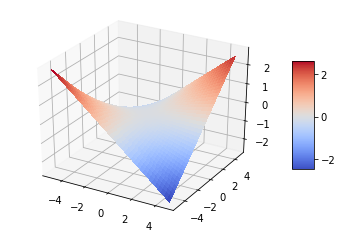

In [399]:
%run "Function Bank.ipynb"
graphSurface(mystery_func1)

Consider the function above. You are given the following points.

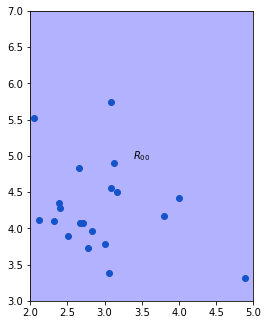

In [404]:
pointList = generateCluster(2,5,3,7,20)
plotRectangleList(2,5,3,7,1,pointList)

Using any of the above mesh analysis techniques, draw the contour plot of the function, to the best of your ability, and estimate the volume between the region and the function.

Extra Credit: Write your own mesh analysis code